<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Tecnicas Digitales 2

# Trabajo Practico ADC-DAC

*Roman Ordoñez*

## Objetivo

Se desea estimar la velocidad de movimiento de un potenciometro con un sistema desarrollado en Cortex-M.
Para esto se debe: <br>
* Configurar el ADC para adquirir muestras a 1 KHz
* Aplicar un filtro digital de **polo simple IIR** para suavizar el ruido
* Implementar un calculo aproximado de la **velocidad de cambio** (derivada)
* Transmitir resultados por UART para analisis y visualizar de resultados en PC

## Desarrollo

Para lograr estos objetivos se utilizaron dos programas. El primero de ello fue el *STM32CubeIDE* donde se realizo la configuracion del timer, del ADC, de la UART al igual que el armado de la trama mandada y la realizacion de los filtros. Estos ultimos son de caracteristicas similares ya que ambos son IIR de polo simple, con igual variable $\alpha$ pero utilizan diferentes variables como entradas y salidas.
La forma de estos filtros es de: y[n] = $\alpha$ * x[n] + (1- $\alpha$) * y[n - 1] , lo que muestra que dependemos de un estado anterior de la salida nada mas.
Ahora bien la trama armada cuenta de 4 datos: el primero es el tiempo, dado por la funcion HAL_TICK(), el segundo es el valor ADC leido antes de su paso por el filtro, el tercero es ahora si el valor ADC filtrado y por ultimo se encuentra la velocidad del potenciometro, la cual sera la derivada del valor adc filtrado que es posteriormente pasada por un filtro IIR como el detallado. La formula utilizada para el calculo de la velocidad es la correspondiente a la derivada para v[n] = y[n] − y[n − 1]
Por otro lado, se utiliza el software de Spyder para realizar el programa encargado de leer el archivo enviado por UART y graficar los datos que ahi se encuentran. A continuacion se deja el codigo con los grafcios debajo. En este caso, se leen 500 valores del archivo para mostrar claridad en los graficos.

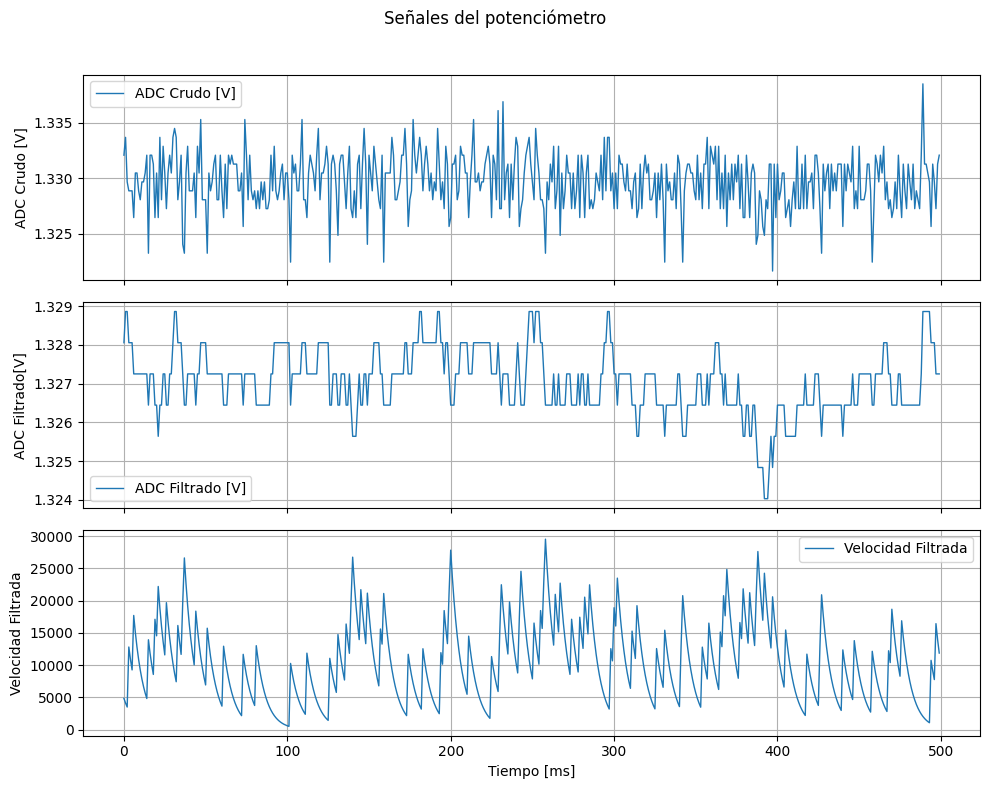

In [7]:
"""
Created on Thu Sep 18 17:09:16 2025

@author: roman
"""

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# --- Configuración ---
N_BITS = 12
VREF = 3.3
FILENAME = "datos.txt"

def main():
    # Cargar datos (ignorando las primeras líneas raras si las hubiera)
    data = np.loadtxt(FILENAME, delimiter=",",max_rows=500) #, usecols=(0,1,2,3))


    tiempo = data[:, 0] - data[0, 0]   
    adc1 = data[:, 1]
    adc2 = data[:, 2]
    adc3 = data[:, 3]

    # Conversión a voltaje para adc1 y adc2 (adc3 parece otro tipo de dato, lo dejamos crudo)
    volt1 = adc1 * VREF / (2**N_BITS - 1)
    volt2 = adc2 * VREF / (2**N_BITS - 1)

    #Graficar
    fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    axs[0].plot(tiempo, volt1, linewidth=1, label="ADC Crudo [V]")
    axs[0].set_ylabel("ADC Crudo [V]")
    axs[0].grid(True)
    axs[0].legend()

    axs[1].plot(tiempo, volt2, linewidth=1, label="ADC Filtrado [V]")
    axs[1].set_ylabel("ADC Filtrado[V]")
    axs[1].grid(True)
    axs[1].legend()

    axs[2].plot(tiempo, adc3, linewidth=1, label="Velocidad Filtrada")
    axs[2].set_xlabel("Tiempo [ms]")
    axs[2].set_ylabel("Velocidad Filtrada")
    axs[2].grid(True)
    axs[2].legend()

    fig.suptitle("Señales del potenciómetro")
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # deja espacio al título
    plt.show()

if __name__ == "__main__":
    main()


Se deja el codigo completo con la visualizacion de los graficos en una ventana aparte en los archivos entregados. El main del proyecto realizado en STM32CubeIDE tambien estara en lo entregado.

## Conclusiones

Con la realizacion de este proyecto se logro una vision mas practica de lo visto en clase entorno a los filtros digitales, a las funciones del ADC-DAC y a la implementacion de los mismos en las placas de desarrollo.
Se logro apreciar la diferencia que realiza un filtro aun siendo de polo simple a la señal viendo las notorias diferencias entre la señal previo y post filtrado y la importancia que el valor asignado a $\alpha$ tiene en dicho filtro